In [483]:
import cv2 as cv
import numpy as np
import cvlib
import os
import glob
from sklearn.ensemble import RandomForestClassifier
import joblib


In [484]:
PATH = '/Users/estebansamayoa/Desktop/CS UFM/8vo Semestre/Computer Vision/Proyecto 1 ES/LicencePlates/'

img=cvlib.imgread(PATH+'images20.jpg')

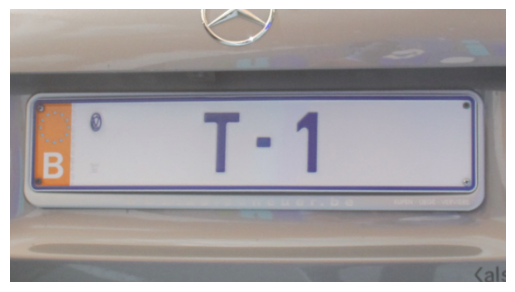

In [485]:
cvlib.imgview(img)

In [486]:
img=cvlib.grayscale(img)

In [487]:
def cortar(img):  
    blurred = cv.GaussianBlur(img, (5, 5), 0)
    edges = cv.Canny(blurred, 50, 150)

    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    max_brightness = 0
    canvas = img.copy()
    for cnt in contours:
        rect = cv.boundingRect(cnt)
        x, y, w, h = rect
        if w*h > 40000:
            mask = np.zeros(img.shape, np.uint8)
            mask[y:y+h, x:x+w] = img[y:y+h, x:x+w]
            brightness = np.sum(mask)
            if brightness > max_brightness:
                brightest_rectangle = rect
                max_brightness = brightness

    if brightest_rectangle is not None:
        x, y, w, h = brightest_rectangle
        cropped_image = img[y:y + h, x:x + w]
    return cropped_image

In [488]:
cropped_image=cortar(img)

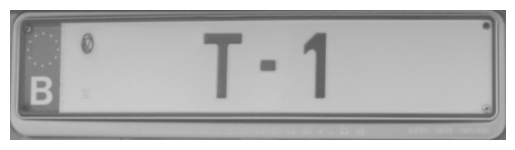

In [489]:
cvlib.imgview(cropped_image)

In [490]:
cropped_image=cortar(cropped_image)

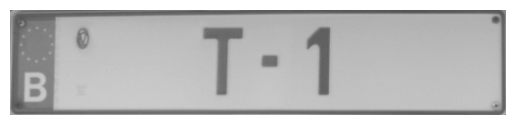

In [491]:
cvlib.imgview(cropped_image)

In [492]:
def shadow_remove(img):
    rgb_planes = cv.split(img)
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv.dilate(plane, np.ones((11,11), np.uint8))
        bg_img = cv.medianBlur(dilated_img, 21)
        diff_img = 255 - cv.absdiff(plane, bg_img)
        norm_img = cv.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8UC1)
        result_norm_planes.append(norm_img)
    shadowremov = cv.merge(result_norm_planes)
    return shadowremov

In [493]:
def thresholding(img):
    """
    Hace una binarización de los valores de la imagen que se le envía y luego, invierte los colores, es decir 
    los valores de 255 los vuelve 0 y viceversa.
    """
    img=shadow_remove(img)
    blur = cv.GaussianBlur(img,(5,5),0)
    ret3,binary_image = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) 
    return binary_image

In [494]:
binary_image=thresholding(cropped_image)

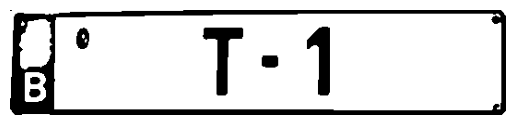

In [495]:
cvlib.imgview(binary_image)

In [496]:
edges = cv.Canny(binary_image, 50, 150)

In [497]:
contours, _ = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 
approved=()

height, width = cropped_image.shape
min_height_percentage = 40
max_height_percentage = 90
min_width_percentage = 2.5
max_width_percentage = 120

# Calculate the actual minimum and maximum height and width
min_height = (min_height_percentage / 100) * height
max_height = (max_height_percentage / 100) * height
min_width = (min_width_percentage / 100) * width
max_width = (max_width_percentage / 100) * width

result_image = cropped_image.copy()
sorted_contours = sorted(contours, key=lambda contour: cv.boundingRect(contour)[0])

for contour in sorted_contours:
    x, y, w, h = cv.boundingRect(contour)

    if min_height <= h <= max_height and min_width <= w <= max_width:
        approved += (contour,)
        cv.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 3)


In [498]:
subimages = []

for contour in approved:
    x, y, w, h = cv.boundingRect(contour)

    subimage = cropped_image[y:y + h, x:x + w]
    subimage = cv.resize(subimage, (28, 28))
    subimage = subimage.flatten()

    subimages.append(subimage)

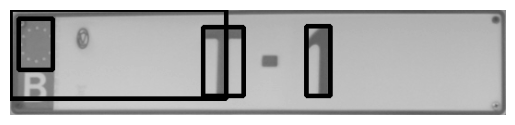

In [499]:
cvlib.imgview(result_image)

In [500]:
random_f = joblib.load("random_f.joblib")

In [501]:
valores=[]
for image in subimages:
    image=image.reshape(1,-1)
    y_pred=random_f.predict(image)
    valores.append(y_pred)


In [502]:
values=""
for i in valores:
    for j in i:
        values+=j
values

'JJT1'

In [503]:
img=cvlib.imgread(PATH+'images20.jpg')

In [504]:
blurred = cv.GaussianBlur(img, (5, 5), 0)

edges = cv.Canny(blurred, 50, 150)

contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
max_brightness = 0
canvas = img.copy()
for cnt in contours:
    rect = cv.boundingRect(cnt)
    x, y, w, h = rect
    if w*h > 40000:
        mask = np.zeros(img.shape, np.uint8)
        mask[y:y+h, x:x+w] = img[y:y+h, x:x+w]
        brightness = np.sum(mask)
        if brightness > max_brightness:
            brightest_rectangle = rect
            max_brightness = brightness

if brightest_rectangle is not None:
    x, y, w, h = brightest_rectangle
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    

In [505]:
text = values
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 240, 0)
x, y = 40, 40
cv.putText(img, text, (x, y), font, font_scale, font_color, thickness=2)

array([[[217, 216, 206],
        [218, 216, 208],
        [219, 217, 209],
        ...,
        [161, 148, 140],
        [162, 148, 142],
        [158, 144, 138]],

       [[218, 215, 207],
        [217, 214, 209],
        [217, 214, 209],
        ...,
        [160, 147, 139],
        [161, 147, 141],
        [160, 146, 140]],

       [[216, 210, 205],
        [213, 209, 204],
        [214, 210, 205],
        ...,
        [160, 147, 139],
        [160, 146, 140],
        [160, 146, 140]],

       ...,

       [[ 94,  94,  94],
        [ 95,  94,  96],
        [ 93,  95,  96],
        ...,
        [ 94,  94,  94],
        [102, 103, 107],
        [110, 107, 116]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 86,  88,  89],
        [ 92,  91,  95],
        [ 95,  94,  98]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 95,  99, 100],
        [ 92,  95,  99],
        [ 89,  94,  97]]

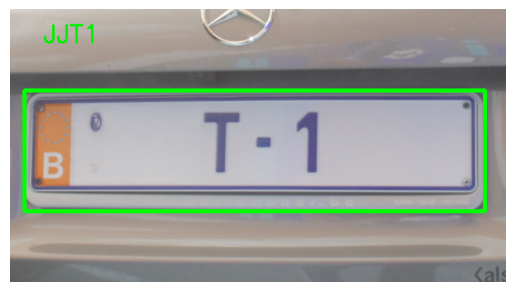

In [506]:
cvlib.imgview(img)